- Add a threshold for discarding points in the elevation map: -10

In [1]:
import pandas as pd
import geopandas as gpd
from osgeo import osr, gdal
import matplotlib.pyplot as plt
import numpy as np
import georasters as gr
import seaborn as sns
sns.set_theme(style="darkgrid")
from scipy.interpolate import griddata
import rasterio
import pyproj
from rasterio.plot import show

/Users/ngochoang/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
dataset = rasterio.open('Elevation.tif')
elevation = dataset.read(1)

In [3]:
elevation_new = elevation.astype('float')
elevation_new[elevation_new == 32767] = np.nan

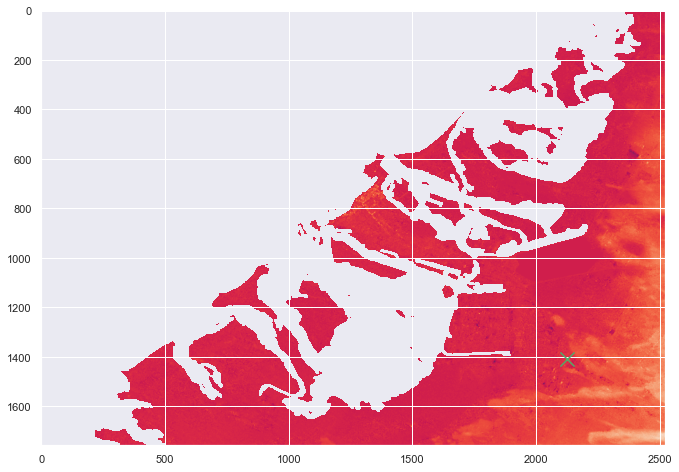

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(2125, 1408, marker='x', s=200, color='g')
plt.imshow(elevation_new)

In [5]:
np.where(elevation == -89)

(array([1408]), array([2125]))

In [6]:
soa_shape_map_path = r"UAE_habitats_new1.shp"
soa_shape_map = gpd.read_file(soa_shape_map_path)

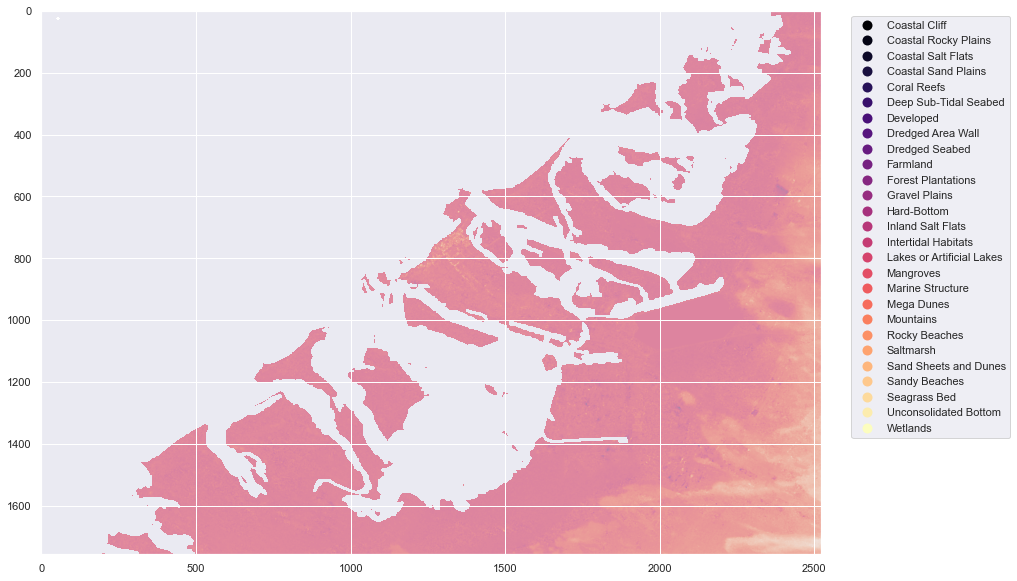

In [11]:
f, ax = plt.subplots(1, 1, figsize=(14, 10))
ax = soa_shape_map.plot(column='Habitats', ax=ax, legend=True, cmap='magma')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.25, 1))
ax.imshow(elevation_new, alpha=0.5)
plt.show()

In [12]:
# https://geopandas.org/docs/user_guide/set_operations.html

- Grid data for habitat and elevation in the same area
- CPD tables for SLR - bins of same range
- Discritization of VLM - bins of same size (~ same number of points) (3 bins?)
- Elevation: about 6 classes